기상특보

호우, 대설, 폭풍해일 등 12개 기상현상에 대해 중대한 재해발생이 예상될 때 해당 지역에 대하여 기상특보의 발표 기준에 따라 주의보 및 경보로 구분하여 171개 시 · 군 단위와 26개 해역으로 세분화하여 발표합니다.

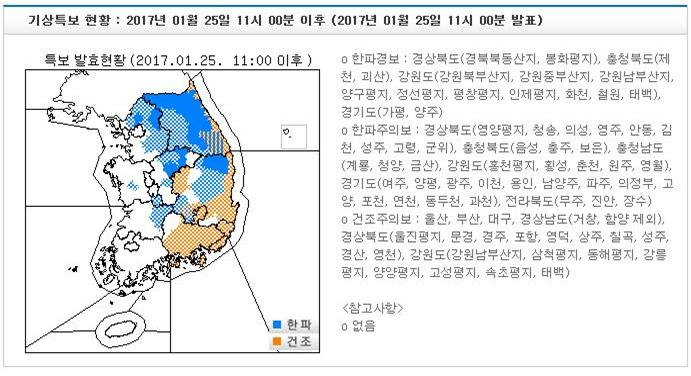

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/s0nghyunje0ng/2025-weather-bigdata-contest/safety/topic2_safety/data/external/FCT_WRN_20250610101710.xls"

tables = pd.read_html(url)
tables

[                                             발표시각  \
                                              발표시각   
                                              발표시각   
                                              발표시각   
                                              발표시각   
                                              발표시각   
                                              발표시각   
                                              발표시각   
                                              발표시각   
                                              발표시각   
                                              발표시각   
                                              발표시각   
                                              발표시각   
                                              발표시각   
                                              발표시각   
                                              발표시각   
                                              발표시각   
                                              발표시각   
                            

In [2]:
len(tables)

1

In [3]:
df_wrn_raw = tables[0]
df_wrn_raw.head(20)

,발표시각,지역
,발표시각,지역
,발표시각,지역
,발표시각,지역
,발표시각,지역
,발표시각,지역
,발표시각,지역
,발표시각,지역
,발표시각,지역
,발표시각,지역
,발표시각,지역


각 특보는 7줄을 한 묶음으로 구성

In [4]:
import numpy as np

wrn_arr = df_wrn_raw.to_numpy()

# 전체 데이터에서 7행씩 끊어서 필요한 정보만 추출
parsed_records = []
for i in range(0, wrn_arr.shape[0], 7):
    try:
        발표시각 = wrn_arr[i, 0]
        지역 = wrn_arr[i, 1]
        발효시각 = wrn_arr[i + 2, 0]
        해당지역 = wrn_arr[i + 4, 0]
        내용 = wrn_arr[i + 6, 0]
        parsed_records.append({
            "발표시각": 발표시각,
            "지역": 지역,
            "발효시각": 발효시각,
            "해당지역": 해당지역,
            "내용": 내용
        })
    except IndexError:
        # 마지막 블록이 7행이 안 되는 경우 무시
        continue

df_wrn_parsed = pd.DataFrame(parsed_records)
df_wrn_parsed.sample(5)

,발표시각,지역,발효시각,해당지역,내용
1364,2022-12-17 18:00,부산·울산·경상남도,(1) 풍랑주의보 발표 : 2022년 12월 17일 20시 00분,"(1) 풍랑주의보 발표 : 동해남부남쪽안쪽먼바다, 동해남부남쪽바깥먼바다",(1) 풍랑주의보 발표 o 해제 예고: 20일 새벽(03시~06시)
1603,2023-05-06 03:00,부산·울산·경상남도,(1) 호우주의보 해제 : 2023년 05월 06일 03시 00분,"(1) 호우주의보 해제 : 경상남도(양산, 창원, 김해, 통영)",NaN
502,2021-04-18 14:00,부산·울산·경상남도,(1) 풍랑주의보 해제 : 2021년 04월 18일 15시 00분 (2) 풍랑주의보...,(1) 풍랑주의보 해제 : 남해동부먼바다 (2) 풍랑주의보 해제 : 동해남부남쪽먼바다,NaN
995,2022-02-19 18:00,부산·울산·경상남도,(1) 풍랑주의보 발표 : 2022년 02월 19일 20시 00분,(1) 풍랑주의보 발표 : 남해동부안쪽먼바다,(1) 풍랑주의보 발표 o 해제 예고: 21일 새벽(03시~06시)
712,2021-08-19 17:30,부산·울산·경상남도,(1) 호우주의보 발표 : 2021년 08월 19일 17시 30분,(1) 호우주의보 발표 : 경상남도(산청),NaN


In [5]:
df_temp = df_wrn_parsed.copy()

# 컬럼별로 길이가 가장 긴 행 추출
for col in ["발효시각", "해당지역", "내용"]:
    df_temp[f"{col}_길이"] = df_temp[col].astype(str).apply(len)
    print(f"\n📌 길이가 가장 긴 {col}:")
    print(df_temp.loc[df_temp[f"{col}_길이"].idxmax()][col])


📌 길이가 가장 긴 발효시각:
(1) 강풍주의보 발표 : 2023년 04월 05일 10시 00분 (2) 풍랑주의보 발표 : 2023년 04월 05일 10시 00분 (3) 풍랑주의보 발표 : 2023년 04월 05일 10시 00분 (4) 풍랑주의보 발표 : 2023년 04월 05일 10시 00분 (5) 호우주의보 발표 : 2023년 04월 05일 11시 00분 (6) 호우주의보 발표 : 2023년 04월 05일 12시 00분

📌 길이가 가장 긴 해당지역:
(1) 풍랑주의보 발표 : 남해동부앞바다(경남서부남해앞바다)  o 경남서부남해앞바다(남해군연안바다, 서부평수구역, 동부평수구역 제외) (2) 풍랑주의보 발표 : 남해동부앞바다(거제시동부앞바다, 부산앞바다), 동해남부앞바다(울산앞바다)  o 거제시동부앞바다(경남서부남해앞바다중 거제시동부연안바다, 경남서부남해앞바다중 거제시동부연안바다 제외)  o 부산앞바다(연안바다, 서부평수구역, 동부평수구역 제외)  o 울산앞바다(연안바다, 평수구역 제외) (3) 한파주의보 발표 : 울산, 부산, 경상남도

📌 길이가 가장 긴 내용:
(1) 풍랑주의보 발표  o 해제 예고: 20일 밤(21시~24시) (2) 풍랑주의보 발표  o 해제 예고: 21일 새벽(03시~06시) (3) 풍랑주의보 발표  o 해제 예고: 21일 아침(06시~09시) (4) 풍랑주의보 발표  o 해제 예고: 21일 오전(09시~12시) (5) 풍랑주의보 발표  o 해제 예고: 21일 오후(15시~18시)


여러 특보를 한꺼번에 포함하는 경우 존재 → 분리 필요

In [6]:
import re

# (1), (2), ... 기준으로 분리
def split_rows(text):
    parts = re.split(r"(?=\(\d+\))", str(text))
    return [p.strip() for p in parts if p.strip()]

split_time_rows = []
for _, row in df_wrn_parsed.iterrows():
    blocks = split_rows(row["발효시각"])
    for block in blocks:
        new_row = row.copy()
        new_row["발효시각"] = block
        split_time_rows.append(new_row)

df_split_time = pd.DataFrame(split_time_rows)

split_area_rows = []
for _, row in df_split_time.iterrows():
    blocks = split_rows(row["해당지역"])
    for block in blocks:
        new_row = row.copy()
        new_row["해당지역"] = block
        split_area_rows.append(new_row)

df_split_time_and_area = pd.DataFrame(split_area_rows)

print(f"원본 {df_wrn_parsed.shape}")
display(df_wrn_parsed[4:5])
print(f"\n분리 후 {df_split_time_and_area.shape}")
display(df_split_time_and_area[4:8])

원본 (2797, 5)


,발표시각,지역,발효시각,해당지역,내용
4,2020-05-09 09:30,부산·울산·경상남도,(1) 강풍주의보 발표 : 2020년 05월 09일 11시 00분 (2) 풍랑주의보...,"(1) 강풍주의보 발표 : 울산, 부산, 경상남도(남해, 거제, 통영) (2) 풍랑...",(1) 강풍주의보 발표 o 해제 예고: 9일 밤 (2) 풍랑주의보 발표 o 해제...



분리 후 (6076, 5)


,발표시각,지역,발효시각,해당지역,내용
4,2020-05-09 09:30,부산·울산·경상남도,(1) 강풍주의보 발표 : 2020년 05월 09일 11시 00분,"(1) 강풍주의보 발표 : 울산, 부산, 경상남도(남해, 거제, 통영)",(1) 강풍주의보 발표 o 해제 예고: 9일 밤 (2) 풍랑주의보 발표 o 해제...
4,2020-05-09 09:30,부산·울산·경상남도,(1) 강풍주의보 발표 : 2020년 05월 09일 11시 00분,"(2) 풍랑주의보 발표 : 남해동부앞바다(거제시동부앞바다, 경남서부남해앞바다, 부산...",(1) 강풍주의보 발표 o 해제 예고: 9일 밤 (2) 풍랑주의보 발표 o 해제...
4,2020-05-09 09:30,부산·울산·경상남도,(2) 풍랑주의보 발표 : 2020년 05월 09일 11시 00분,"(1) 강풍주의보 발표 : 울산, 부산, 경상남도(남해, 거제, 통영)",(1) 강풍주의보 발표 o 해제 예고: 9일 밤 (2) 풍랑주의보 발표 o 해제...
4,2020-05-09 09:30,부산·울산·경상남도,(2) 풍랑주의보 발표 : 2020년 05월 09일 11시 00분,"(2) 풍랑주의보 발표 : 남해동부앞바다(거제시동부앞바다, 경남서부남해앞바다, 부산...",(1) 강풍주의보 발표 o 해제 예고: 9일 밤 (2) 풍랑주의보 발표 o 해제...


In [7]:
# 발효시각과 해당지역에서 특보종류, 특보수준, 특보명령, 발효시각/해당지역을 파생변수로 분리
def parse_warning_info(text):
    pattern = r"\(\d+\)?\s*([가-힣]+?(주의보|경보))\s*(발표|해제|변경)?\s*:\s*(.+)"
    match = re.match(pattern, str(text))
    if match:
        wrn_tp, wrn_lvl, wrn_cmd, content = match.groups()
        return pd.Series({
            "WRN_TP": wrn_tp.replace(wrn_lvl, ""),
            "WRN_LVL": wrn_lvl,
            "WRN_CMD": wrn_cmd,
            "CONTENT": content.strip()
        })
    else:
        return pd.Series({
            "WRN_TP": None,
            "WRN_LVL": None,
            "WRN_CMD": None,
            "CONTENT": None
        })

# 발효시각 컬럼 파싱
parsed_time = df_split_time_and_area["발효시각"].apply(parse_warning_info)
parsed_time.columns = ["특보종류(1)", "특보수준(1)", "특보명령(1)", "발효시각"]

# 해당지역 컬럼 파싱
parsed_area = df_split_time_and_area["해당지역"].apply(parse_warning_info)
parsed_area.columns = ["특보종류(2)", "특보수준(2)", "특보명령(2)", "해당지역"]

# 원본과 결합
df_feature_extracted = pd.concat([df_split_time_and_area.drop(columns=["발효시각", "해당지역"]), parsed_time, parsed_area], axis=1)

print(f"원본 {df_split_time_and_area.shape}")
display(df_split_time_and_area.head(3))
print(f"\n파싱 후 {df_feature_extracted.shape}")
display(df_feature_extracted.head(3))

원본 (6076, 5)


,발표시각,지역,발효시각,해당지역,내용
0,2020-05-02 21:00,부산·울산·경상남도,(1) 건조주의보 해제 : 2020년 05월 02일 21시 00분,"(1) 건조주의보 해제 : 울산, 부산, 경상남도(고성, 거제, 통영 제외)",NaN
1,2020-05-06 16:00,부산·울산·경상남도,(1) 풍랑주의보 발표 : 2020년 05월 06일 19시 00분,(1) 풍랑주의보 발표 : 남해동부먼바다,(1) 풍랑주의보 발표 o 해제 예고: 7일 밤(21시~24시)
2,2020-05-07 16:00,부산·울산·경상남도,(1) 풍랑주의보 해제 : 2020년 05월 07일 18시 00분,(1) 풍랑주의보 해제 : 남해동부먼바다,NaN



파싱 후 (6076, 11)


,발표시각,지역,내용,특보종류(1),특보수준(1),특보명령(1),발효시각,특보종류(2),특보수준(2),특보명령(2),해당지역
0,2020-05-02 21:00,부산·울산·경상남도,NaN,건조,주의보,해제,2020년 05월 02일 21시 00분,건조,주의보,해제,"울산, 부산, 경상남도(고성, 거제, 통영 제외)"
1,2020-05-06 16:00,부산·울산·경상남도,(1) 풍랑주의보 발표 o 해제 예고: 7일 밤(21시~24시),풍랑,주의보,발표,2020년 05월 06일 19시 00분,풍랑,주의보,발표,남해동부먼바다
2,2020-05-07 16:00,부산·울산·경상남도,NaN,풍랑,주의보,해제,2020년 05월 07일 18시 00분,풍랑,주의보,해제,남해동부먼바다


In [8]:
# 발효시각(특보종류, 특보수준, 특보명령)과 해당지역(특보종류, 특보수준, 특보명령)이 일치하는 행만 필터링
df_filtered = df_feature_extracted[
    (df_feature_extracted["특보종류(1)"] == df_feature_extracted["특보종류(2)"]) &
    (df_feature_extracted["특보수준(1)"] == df_feature_extracted["특보수준(2)"]) &
    (df_feature_extracted["특보명령(1)"] == df_feature_extracted["특보명령(2)"])
].copy()

print(f"원본 {df_feature_extracted.shape}")
display(df_feature_extracted[4:8])
print(f"\n필터링 후 {df_filtered.shape}")
display(df_filtered[4:6])

원본 (6076, 11)


,발표시각,지역,내용,특보종류(1),특보수준(1),특보명령(1),발효시각,특보종류(2),특보수준(2),특보명령(2),해당지역
4,2020-05-09 09:30,부산·울산·경상남도,(1) 강풍주의보 발표 o 해제 예고: 9일 밤 (2) 풍랑주의보 발표 o 해제...,강풍,주의보,발표,2020년 05월 09일 11시 00분,강풍,주의보,발표,"울산, 부산, 경상남도(남해, 거제, 통영)"
4,2020-05-09 09:30,부산·울산·경상남도,(1) 강풍주의보 발표 o 해제 예고: 9일 밤 (2) 풍랑주의보 발표 o 해제...,강풍,주의보,발표,2020년 05월 09일 11시 00분,풍랑,주의보,발표,"남해동부앞바다(거제시동부앞바다, 경남서부남해앞바다, 부산앞바다) o 거제시동부앞바..."
4,2020-05-09 09:30,부산·울산·경상남도,(1) 강풍주의보 발표 o 해제 예고: 9일 밤 (2) 풍랑주의보 발표 o 해제...,풍랑,주의보,발표,2020년 05월 09일 11시 00분,강풍,주의보,발표,"울산, 부산, 경상남도(남해, 거제, 통영)"
4,2020-05-09 09:30,부산·울산·경상남도,(1) 강풍주의보 발표 o 해제 예고: 9일 밤 (2) 풍랑주의보 발표 o 해제...,풍랑,주의보,발표,2020년 05월 09일 11시 00분,풍랑,주의보,발표,"남해동부앞바다(거제시동부앞바다, 경남서부남해앞바다, 부산앞바다) o 거제시동부앞바..."



필터링 후 (4503, 11)


,발표시각,지역,내용,특보종류(1),특보수준(1),특보명령(1),발효시각,특보종류(2),특보수준(2),특보명령(2),해당지역
4,2020-05-09 09:30,부산·울산·경상남도,(1) 강풍주의보 발표 o 해제 예고: 9일 밤 (2) 풍랑주의보 발표 o 해제...,강풍,주의보,발표,2020년 05월 09일 11시 00분,강풍,주의보,발표,"울산, 부산, 경상남도(남해, 거제, 통영)"
4,2020-05-09 09:30,부산·울산·경상남도,(1) 강풍주의보 발표 o 해제 예고: 9일 밤 (2) 풍랑주의보 발표 o 해제...,풍랑,주의보,발표,2020년 05월 09일 11시 00분,풍랑,주의보,발표,"남해동부앞바다(거제시동부앞바다, 경남서부남해앞바다, 부산앞바다) o 거제시동부앞바..."


In [9]:
df_wrn_final = df_filtered[["발표시각", "지역", "해당지역", "특보종류(1)", "특보수준(1)", "특보명령(1)", "발효시각"]].copy()
df_wrn_final.columns = ["발표시각", "지역", "해당지역", "특보종류", "특보수준", "특보명령", "발효시각"]

df_wrn_final["발표시각"] = pd.to_datetime(df_wrn_final["발표시각"], format="%Y-%m-%d %H:%M")
df_wrn_final["해당지역"] = df_wrn_final["해당지역"].apply(lambda x: x.split("o")[0].strip() if "o" in x else x)
df_wrn_final["발효시각"] = pd.to_datetime(df_wrn_final["발효시각"], format="%Y년 %m월 %d일 %H시 %M분")

df_wrn_busan = df_wrn_final[df_wrn_final["해당지역"].str.contains("부산", na=False)].copy().reset_index(drop=True)

print(f"부산·울산·경상남도 전체 {df_wrn_final.shape}")
display(df_wrn_final.head())
print(f"\n부산 only {df_wrn_busan.shape}")
display(df_wrn_busan.head())

부산·울산·경상남도 전체 (4503, 7)


,발표시각,지역,해당지역,특보종류,특보수준,특보명령,발효시각
0,2020-05-02 21:00:00,부산·울산·경상남도,"울산, 부산, 경상남도(고성, 거제, 통영 제외)",건조,주의보,해제,2020-05-02 21:00:00
1,2020-05-06 16:00:00,부산·울산·경상남도,남해동부먼바다,풍랑,주의보,발표,2020-05-06 19:00:00
2,2020-05-07 16:00:00,부산·울산·경상남도,남해동부먼바다,풍랑,주의보,해제,2020-05-07 18:00:00
3,2020-05-09 04:00:00,부산·울산·경상남도,남해동부먼바다,풍랑,주의보,발표,2020-05-09 08:00:00
4,2020-05-09 09:30:00,부산·울산·경상남도,"울산, 부산, 경상남도(남해, 거제, 통영)",강풍,주의보,발표,2020-05-09 11:00:00



부산 only (1007, 7)


,발표시각,지역,해당지역,특보종류,특보수준,특보명령,발효시각
0,2020-05-02 21:00:00,부산·울산·경상남도,"울산, 부산, 경상남도(고성, 거제, 통영 제외)",건조,주의보,해제,2020-05-02 21:00:00
1,2020-05-09 09:30:00,부산·울산·경상남도,"울산, 부산, 경상남도(남해, 거제, 통영)",강풍,주의보,발표,2020-05-09 11:00:00
2,2020-05-09 09:30:00,부산·울산·경상남도,"남해동부앞바다(거제시동부앞바다, 경남서부남해앞바다, 부산앞바다)",풍랑,주의보,발표,2020-05-09 11:00:00
3,2020-05-09 16:00:00,부산·울산·경상남도,"울산, 부산, 경상남도(남해, 거제, 통영)",강풍,주의보,해제,2020-05-09 18:00:00
4,2020-05-09 19:00:00,부산·울산·경상남도,"남해동부앞바다(거제시동부앞바다, 경남서부남해앞바다, 부산앞바다)",풍랑,주의보,해제,2020-05-09 21:00:00


In [10]:
df_wrn_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4503 entries, 0 to 2796
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   발표시각    4503 non-null   datetime64[ns]
 1   지역      4503 non-null   object        
 2   해당지역    4503 non-null   object        
 3   특보종류    4503 non-null   object        
 4   특보수준    4503 non-null   object        
 5   특보명령    4503 non-null   object        
 6   발효시각    4503 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(5)
memory usage: 281.4+ KB


In [11]:
df_wrn_busan["특보종류"].value_counts()

,count
특보종류,
풍랑,399
강풍,216
호우,154
건조,80
폭염,74
폭풍해일,38
한파,23
태풍,21
황사,2


In [12]:
df_wrn_busan["특보수준"].value_counts()

,count
특보수준,
주의보,921
경보,86


In [13]:
df_wrn_busan["특보명령"].value_counts()

,count
특보명령,
발표,458
해제,436
변경,113


In [14]:
df_wrn_busan.to_csv("busan_weather_warning.csv", index=False, encoding="utf-8-sig")

In [15]:
df_wrn_busan

,발표시각,지역,해당지역,특보종류,특보수준,특보명령,발효시각
0,2020-05-02 21:00:00,부산·울산·경상남도,"울산, 부산, 경상남도(고성, 거제, 통영 제외)",건조,주의보,해제,2020-05-02 21:00:00
1,2020-05-09 09:30:00,부산·울산·경상남도,"울산, 부산, 경상남도(남해, 거제, 통영)",강풍,주의보,발표,2020-05-09 11:00:00
2,2020-05-09 09:30:00,부산·울산·경상남도,"남해동부앞바다(거제시동부앞바다, 경남서부남해앞바다, 부산앞바다)",풍랑,주의보,발표,2020-05-09 11:00:00
3,2020-05-09 16:00:00,부산·울산·경상남도,"울산, 부산, 경상남도(남해, 거제, 통영)",강풍,주의보,해제,2020-05-09 18:00:00
4,2020-05-09 19:00:00,부산·울산·경상남도,"남해동부앞바다(거제시동부앞바다, 경남서부남해앞바다, 부산앞바다)",풍랑,주의보,해제,2020-05-09 21:00:00
...,...,...,...,...,...,...,...
1002,2024-10-22 11:00:00,부산·울산·경상남도,"경상남도(창원, 거제), 부산",호우,주의보,해제,2024-10-22 11:00:00
1003,2024-10-28 16:00:00,부산·울산·경상남도,"남해동부앞바다(부산앞바다, 거제시동부앞바다)",풍랑,주의보,발표,2024-10-28 17:00:00
1004,2024-10-28 16:00:00,부산·울산·경상남도,"남해동부앞바다(부산앞바다, 거제시동부앞바다)",풍랑,주의보,발표,2024-10-28 18:00:00
1005,2024-10-29 06:40:00,부산·울산·경상남도,"울산앞바다(연안바다), 부산앞바다(동부평수구역, 서부평수구역, 연안바다)",풍랑,주의보,해제,2024-10-29 06:40:00
